# Julia practice 1
문제에 제시된 식을 빈칸에 채우거나 Convex 패키지를 활용해 문제를 풀어 보세요!

Practice 2는 있을지 없을지 모르겠네요... ~~만들기 너무 힘들어요~~

## 1. Shortest path on a graph
다음의 그래프가 있다고 합시다.
![https://julia.quantecon.org/_static/figures/graph.png](https://julia.quantecon.org/_static/figures/graph.png)
우리는 그래프를 따라 목적지에 도달하는 최단 경로를 찾고 싶습니다.

- 화살표(방향이 있는 간선)를 따라 각 노드(동그라미)에서 노드로 움직일 수 있습니다. 
- 간선 위에 써진 숫자는 거리, 즉 cost를 의미합니다.

이 그래프에서 최단 경로는 눈으로도 쉽게 찾을 수 있습니다.

- A, C, F, G - cost 8  


![https://julia.quantecon.org/_static/figures/graph4.png](https://julia.quantecon.org/_static/figures/graph4.png)

  
- A, D, F, G - cost 8  


![https://julia.quantecon.org/_static/figures/graph3.png](https://julia.quantecon.org/_static/figures/graph3.png)

만일 눈으로 찾을 수 없는 복잡한 그래프일 때는 어떻게 할까요?

$ J(v) $ 를 $ v $로부터 출발해 최적의 방법으로 목적지에 도달했을 때의 cost라고 합시다. 

우리가 모든 $ v $에 대하여 $ J(v) $를 안다고 가정합시다. 그러면 $ J(G) = 0 $이 되겠죠? 그리고 위의 예제에 대해서 $ J(v) $는 아래와 같게 나타날 것입니다.

![https://julia.quantecon.org/_static/figures/graph2.png](https://julia.quantecon.org/_static/figures/graph2.png)


최적의 경로는 아래와 같이 찾을 수 있습니다.
- A에서 출발한다.  
- $v$에서 아래의 식을 만족하는 아무 노드로 이동한다.



<a id='equation-spprebell'></a>
$$
\min_{w \in F_v} \{ c(v, w) + J(w) \} \tag{1}
$$

이때

- $ F_v $는 $ v $에서 한 번 이동해서 도달할 수 있는 노드를 의미합니다. 
- $ c(v, w) $ 는 $ v $ 에서 $ w $로 이동하는 데 드는 cost를 의미합니다.


따라서 우리가 $ J $를 안다고 가정하면, 최적의 경로를 찾는 것은 trivial한 문제가 됩니다.

모든 노드 $ v $에 대하여,
$ J $는 정의에 의해 다음의 등식을 만족합니다.


<a id='equation-spbell'></a>
$$
J(v) = \min_{w \in F_v} \{ c(v, w) + J(w) \} \tag{2}
$$

이 등식을 이 문제에 대한 *Bellman equation*이라고 합니다.

위의 *Bellman equation*을 반복적으로 적용해 $ J $를 찾을 수 있습니다. $ M $을 임의의 큰 수라고 놓고,


<a id='equation-spguess'></a>
$$
J_0(v) = M \text{ if } v \not= \text{ destination, else } J_0(v) = 0 \tag{3}
$$
으로 해 놓은 뒤

1. $ n = 0 $으로 놓는다.  
1. $ J_{n+1} (v) = \min_{w \in F_v} \{ c(v, w) + J_n(w) \} $ for all $ v $를 계산한다.  
1. $ J_{n+1} =  J_n $이 될 때까지 반복한다.  


이렇게 반복하면 $ J_n $은 $ J $로 수렴하게 됩니다. (증명되어 있음, [contraction mapping theorem](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem) 참조)

문제: 다음 그래프의 노드 0에서 출발하여 노드 99까지 이동하는 최적 경로를 찾는 알고리즘을 만드세요. 그래프를 보는 방법은 아래와 같습니다.  
ex) 그래프에서 0 ->14로 이동하는 cost = 72.21

In [1]:
using LinearAlgebra, Statistics

In [2]:
graph = Dict(zip(0:99, [[(14, 72.21), (8, 11.11), (1, 0.04)],[(13, 64.94), (6, 20.59), (46, 1247.25)],[(45, 1561.45), (31, 166.8), (66, 54.18)],[(11, 42.43), (6, 2.06), (20, 133.65)],[(7, 1.02), (5, 0.73), (75, 3706.67)],[(11, 34.54),(7, 3.33),(45, 1382.97)],[(10, 13.1), (9, 0.72), (31, 63.17)],[(10, 5.85), (9, 3.15), (50, 478.14)], [(12, 3.18), (11, 7.45), (69, 577.91)],[(20, 16.53), (13, 4.42), (70, 2454.28)],[(16, 25.16), (12, 1.87), (89, 5352.79)],[(20, 65.08), (18, 37.55), (94, 4961.32)],[(28, 170.04), (24, 34.32), (84, 3914.62)],[(40, 475.33), (38, 236.33), (60, 2135.95)],[(24, 38.65), (16, 2.7),(67, 1878.96)],[(18, 2.57),(17, 1.01),(91, 3597.11)],[(38, 278.71),(19, 3.49),(36, 392.92)],[(23, 26.45), (22, 24.78), (76, 783.29)],[(28, 55.84), (23, 16.23), (91, 3363.17)],[(28, 70.54), (20, 0.24), (26, 20.09)],[(33, 145.8), (24, 9.81),(98, 3523.33)],[(31, 27.06),(28, 36.65),(56, 626.04)], [(40, 124.22), (39, 136.32), (72, 1447.22)],[(33, 22.37), (26, 2.66), (52, 336.73)],[(28, 14.25), (26, 1.8), (66, 875.19)],[(35, 45.55),(32, 36.58),(70, 1343.63)],[(42, 122.0),(27, 0.01), (47, 135.78)],[(43, 246.24), (35, 48.1),(65, 480.55)],[(36, 15.52), (34, 21.79), (82, 2538.18)],[(33, 12.61), (32, 4.22),(64, 635.52)], [(35, 13.95), (33, 5.61), (98, 2616.03)],[(44, 125.88),(36, 20.44), (98, 3350.98)],[(35, 1.46), (34, 3.33), (97, 2613.92)], [(47, 111.54), (41, 3.23), (81, 1854.73)],[(48, 129.45), (42, 51.52), (73, 1075.38)],[(50, 78.81), (41, 2.09), (52, 17.57)], [(57, 260.46), (54, 101.08), (71, 1171.6)],[(46, 80.49),(38, 0.36), (75, 269.97)],[(42, 8.78), (40, 1.79), (93, 2767.85)],[(41, 1.34), (40, 0.95), (50, 39.88)],[(54, 53.46), (47, 28.57), (75, 548.68)], [(54, 162.24), (46, 0.28), (53, 18.23)],[(72, 437.49), (47, 10.08), (59, 141.86)],[(60, 116.23), (54, 95.06), (98, 2984.83)], [(47, 2.14), (46, 1.56), (91, 807.39)],[(49, 15.51), (47, 3.68), (58, 79.93)],[(67, 65.48), (57, 27.5), (52, 22.68)],[(61, 172.64), (56, 49.31), (50, 2.82)],[(60, 66.44), (59, 34.52), (99, 2564.12)], [(56, 10.89), (50, 0.51), (78, 53.79)],[(55, 20.1), (53, 1.38), (85, 251.76)],[(60, 73.79),(59, 23.67),(98, 2110.67)], [(66, 123.03), (64, 102.41), (94, 1471.8)],[(67, 88.35),(56, 4.33), (72, 22.85)],[(73, 238.61), (59, 24.3), (88, 967.59)],[(64, 60.8), (57, 2.13), (84, 86.09)],[(61, 11.06), (57, 0.02), (76, 197.03)], [(60, 7.01), (58, 0.46), (86, 701.09)],[(65, 34.32), (64, 29.85), (83, 556.7)],[(71, 0.67), (60, 0.72), (90, 820.66)],[(67, 1.63), (65, 4.76), (76, 48.03)],[(64, 4.88), (63, 0.95), (98, 1057.59)], [(76, 38.43), (64, 2.94), (91, 132.23)],[(75, 56.34), (72, 70.08), (66, 4.43)],[(76, 11.98), (65, 0.3), (80, 47.73)],[(73, 33.23), (66, 0.64), (94, 594.93)],[(73, 37.53), (68, 2.66), (98, 395.63)], [(70, 0.98), (68, 0.09), (82, 153.53)],[(71, 1.66), (70, 3.35), (94, 232.1)],[(73, 8.99), (70, 0.06), (99, 247.8)],[(73, 8.37), (72, 1.5), (76, 27.18)],[(91, 284.64), (74, 8.86), (89, 104.5)], [(92, 133.06), (84, 102.77), (76, 15.32)],[(90, 243.0), (76, 1.4), (83, 52.22)],[(78, 8.08), (76, 0.52), (81, 1.07)],[(77, 1.19), (76, 0.81), (92, 68.53)],[(78, 2.36), (77, 0.45), (85, 13.18)], [(86, 64.32), (78, 0.98), (80, 8.94)],[(81, 2.59), (98, 355.9)],[(91, 22.35), (85, 1.45), (81, 0.09)],[(98, 264.34), (88, 28.78), (92, 121.87)],[(92, 99.89), (89, 39.52), (94, 99.78)],[(93, 11.99), (88, 28.05), (91, 47.44)],[(88, 5.78), (86, 8.75), (94, 114.95)], [(98, 121.05), (94, 30.41), (89, 19.14)],[(89, 4.9), (87, 2.66), (97, 94.51)],[(97, 85.09)],[(92, 21.23), (91, 11.14), (88, 0.21)], [(98, 6.12), (91, 6.83), (93, 1.31)],[(99, 82.12), (97, 36.97)], [(99, 50.99), (94, 10.47), (96, 23.53)],[(97, 22.17)],[(99, 34.68), (97, 11.24), (96, 10.83)],[(99, 32.77), (97, 6.71), (94, 0.19)], [(96, 2.03), (98, 5.91)],[(99, 0.27), (98, 6.17)],[(99, 5.87), (97, 0.43), (98, 3.32)],[(98, 0.3)],[(99, 0.33)],[(99, 0.0)]]))

Dict{Int64, Vector{Tuple{Int64, Float64}}} with 100 entries:
  5  => [(11, 34.54), (7, 3.33), (45, 1382.97)]
  56 => [(61, 11.06), (57, 0.02), (76, 197.03)]
  35 => [(50, 78.81), (41, 2.09), (52, 17.57)]
  55 => [(64, 60.8), (57, 2.13), (84, 86.09)]
  60 => [(67, 1.63), (65, 4.76), (76, 48.03)]
  30 => [(35, 13.95), (33, 5.61), (98, 2616.03)]
  32 => [(35, 1.46), (34, 3.33), (97, 2613.92)]
  6  => [(10, 13.1), (9, 0.72), (31, 63.17)]
  67 => [(70, 0.98), (68, 0.09), (82, 153.53)]
  45 => [(49, 15.51), (47, 3.68), (58, 79.93)]
  73 => [(90, 243.0), (76, 1.4), (83, 52.22)]
  64 => [(76, 11.98), (65, 0.3), (80, 47.73)]
  90 => [(99, 50.99), (94, 10.47), (96, 23.53)]
  4  => [(7, 1.02), (5, 0.73), (75, 3706.67)]
  13 => [(40, 475.33), (38, 236.33), (60, 2135.95)]
  54 => [(73, 238.61), (59, 24.3), (88, 967.59)]
  63 => [(75, 56.34), (72, 70.08), (66, 4.43)]
  86 => [(97, 85.09)]
  91 => [(97, 22.17)]
  62 => [(76, 38.43), (64, 2.94), (91, 132.23)]
  58 => [(65, 34.32), (64, 29.85), (83, 55

설명: graph를 보시면 0~99까지의 숫자와 [(number, cost), (number, cost)]들이 zip으로 연결되어 있죠? 따라서 이 dictionary는 n번 노드에서 한 칸 거리에 있는 노드들과, 그 곳으로 이동하는 데 드는 cost를 의미합니다. 예를 들어 graph[5] = [(11, 34.54), (7, 3.33), (45, 1382.97)]이고 이는 그래프의 5번 노드에서 11번, 7번, 45번으로 이동할 수 있고 그 cost는 각각 34.54, 3.33, 1382.97이라는 것을 의미합니다. 

In [3]:
# Bellman operator(값 업데이트)
#1. = 뒤의 빈 곳을 채우세요.
function update_J!(J, graph)
    next_J = Dict()
    for node in keys(graph)
        if node == 99
            next_J[node] = 0
        else
            next_J[node] = minimum(cost + J[dest] for (dest, cost) in graph[node])
        end
    end
    return next_J
end

#= solution 설명 1
목적지에 도착했으므로 J(99) = 99번 노드에서 99번으로 최적으로 이동했을 때의 cost = 0  
update: graph[node] = 그래프에서 현재 node번 원소 = [(이동 가능한 노드 1, 그때의 cost), (이동 가능한 노드 2, 그때의 cost), ...]
따라서 현재 node에서 어딘가로 이동할 때의 cost + 그때의 J의 함숫값(그 노드로 이동했을 때, 이동한 곳부터 목적지까지의 최적 cost)의 minimum 
-> 위 알고리즘 2번의 정의 그대로.
마지막으로 next_J를 return하면 된다.
이 문제에서 J는 모든 노드에 대해, 그 노드에서 99번으로 이동하는 최적 cost, 즉 J(w) = cost인 함수이다. 
이것을 모르는 상태에서 J_0를 임의로 설정한 뒤 Bellman operator를 반복적으로 적용해 True J가 나올 때까지 업데이트하는 알고리즘이다.
=#

# 계산된 최적 경로를 프린트하는 함수
#2. minimizer_cost 밑부터 sum_cost 위까지의 빈 코드를 채우세요.
function print_best_path(J, graph)
    sum_costs = 0.0
    current_location, destination = extrema(keys(graph))
    while current_location != destination
        println("node $current_location")
        running_min = 1e10
        minimizer_dest = Inf
        minimizer_cost = 1e10
        
        # 정답 시작 부분
        for (dest, cost) in graph[current_location]
            cost_of_path = cost + J[dest]
            if cost_of_path < running_min
                running_min = cost_of_path
                minimizer_cost = cost
                minimizer_dest = dest
            end
        end
        current_location = minimizer_dest
        sum_costs += minimizer_cost
    end
        # 정답 끝 부분

    sum_costs = round(sum_costs, digits = 2)

    println("node $destination\nCost: $sum_costs")
end
#= solution 설명 2
위 while에 걸린 루프를 통해 목적지에 도착하기 전까지 작동한다.
목적지에 도착하기 전까지 cost_of_path = cost + J(dest) -> 현재 노드에서 어딘가로 이동했을 때 그 경로의 총 cost -> running min에 임시로 저장
-> 다른 경로의 총 cost가 더 낮으면 running min을 cost_of_path로 바꿔 준다.
그리고 최적 경로가 정해지면 바로 다음 노드를 current_location으로 저장하고, 그곳으로 가는 cost를 sum_cost(현재까지의 누적 cost)에 더해 준다.

ex) 0번에서 출발하면 14, 8, 1번으로 이동이 가능. 이때 14번으로 갔을 때, 99번까지 도착하면 나오는 최종 cost와 1번으로 갔을 때의 최종 cost를 비교 
-> 당장의 cost는 1번이 0.04로 더 낮지만 최종 cost는 8번으로 가는 게 나은 선택 -> 8번을 경로로 정해 current_location으로 저장하고 
cost인 11.11을 sum_cost에 더해 줌. 이때 J는 위의 update_J!를 통해 업데이트한 최종 함수.
=#


J = Dict((node => Inf) for node in keys(graph)) # J[node w] = optimal cost to node 99

# 반복 부분
#3. else 위의 종료 조건을 작성하세요.
while true
    next_J = update_J!(J, graph)
    if next_J == J
        break
    else
        J = next_J
    end
end
# J를 업데이트하다 수렴하면, 즉 더 이상 업데이트해도 값이 변하지 않으면 break를 통해 루프를 종료.

print_best_path(J, graph)

node 0
node 8
node 11
node 18
node 23
node 33
node 41
node 53
node 56
node 57
node 60
node 67
node 70
node 73
node 76
node 85
node 87
node 88
node 93
node 94
node 96
node 97
node 98
node 99
Cost: 160.55


In [4]:
#=예상 출력

node 0
node 8

... 경로가 쭉 프린트됩니다.

node 99
Cost: xxx.xx
=#

## 2. Chebyshev center
아래에 주어진 affine inequalities 내부 영역(polyhedron)의 가장 큰 euclidean ball을 찾는 것이 목표입니다.  
$P = \{x : a_i'*x \leq b_i, i=1,\ldots,m \}$ where $x \in \mathbb{R}^2$.  
Convex 패키지를 이용하여, 다음 영역의 chebyshev center를 찾고 그림으로 그리세요.      

$$ A = \begin{bmatrix} 2 & 1 \\ 2 & -1 \\ -1 & 2 \\ -1 & -2 \end{bmatrix},\,\,b = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix},\,\,Ax \preceq b$$

### 추가 설명
chebyshev center는 주어진 polyhedron안의 가장 큰 ball의 중심을 말합니다. 즉 polyhedron의 가장 깊은 depth를 가진, 가장 경계에서 먼 점을 말하는 것입니다. ball을 나타내면 $\mathcal{B} = \left\{x_c + u\,\,|\,\lVert u \rVert_2 \leq r \right\} $입니다. constraint(polyhedron 안)에 대입하면 $ a_i^T(x_c + u) \leq b_i $가 될 텐데, 여기서 부등식 좌변의 경계, 즉 좌변에서 가장 큰 값은 ball의 표면, 2차원이니까 원의 경계 상의 점이 되겠죠? 그래서 부등식을 $a_i^Tx_c + r \lVert a_i \rVert_2 \leq b_i$로 다시 쓸 수 있고, 위의 constraint 안에서 $r$을 maximize하는 문제로 표현할 수 있습니다.

In [6]:
using Convex
using LinearAlgebra
using SCS

In [7]:
#1. input data를 만드세요.
a1 = [2; 1];
a2 = [2; -1];
a3 = [-1; 2];
a4 = [-1; -2];
b = ones(4, 1);
# 행렬의 각 행벡터가 linear equation의 식이 된다.

In [8]:
#2. 문제를 구성하고 푸세요.
r = Variable(1)
x_c = Variable(2)
p = maximize(r)
p.constraints += a1' * x_c + r * norm(a1, 2) <= b[1];
p.constraints += a2' * x_c + r * norm(a2, 2) <= b[2];
p.constraints += a3' * x_c + r * norm(a3, 2) <= b[3];
p.constraints += a4' * x_c + r * norm(a4, 2) <= b[4];
solve!(p, SCS.Optimizer; silent_solver = true)
p.optval

0.4472102320727458

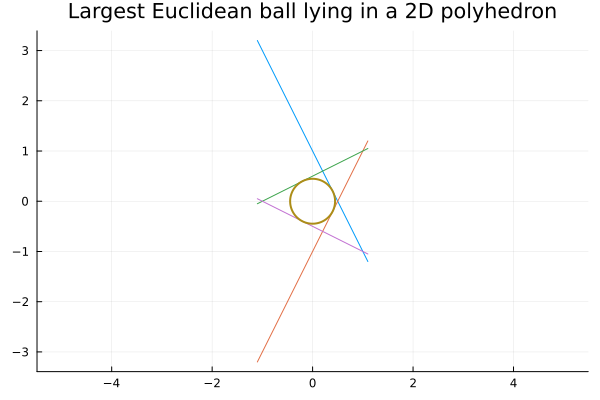

In [10]:
x = range(-1.1, stop=1.1, length=100);
theta = 0:pi/100:2*pi;
# 그래프를 그리기 위해 임의로 그릴 범위 지정

#plot(x, x -> -x * a1[1] / a1[2] + b[1] / a1[2], aspect_ratio=:equal)
#3. 바로 윗 줄의 주석을 참고해 그림을 그리는 코드를 완성하세요. hint: 원을 그릴 때 극좌표를 활용하세요.
using Plots
plot(x, x -> -x * a1[1] / a1[2] + b[1] / a1[2], aspect_ratio=:equal) # 2x_1 + x_2  = 1 -> x_2 = -2x_1 / 1 + 1/1
plot!(x, x -> -x * a2[1]/ a2[2] + b[2] / a2[2])
plot!(x, x -> -x * a3[1]/ a3[2] + b[3] / a3[2])
plot!(x, x -> -x * a4[1]/ a4[2] + b[4] / a4[2])
plot!(evaluate(x_c)[1] .+ evaluate(r) * cos.(theta), evaluate(x_c)[2] .+ evaluate(r) * sin.(theta), linewidth = 2)
plot!(title ="Largest Euclidean ball lying in a 2D polyhedron", legend = nothing)
# (x1, x2) = 원의 중심 + r cos(theta) , 원의 중심 + rcos(theta)

## 3. Portfolio optimization
책에 나온 Markowitz portfolio 문제보다 좀 더 간단한 버전입니다.
이 문제는 주어진 수익의 기댓값 $R_\text{target}$을 만족하면서, 리스크가 가장 적은 portfolio, 즉 주식을 어디에 얼마나 투자할 것인지 적절한 가중치를 찾는 문제입니다.

우리가 $n$개의 자산의 수익의 기댓값 $\mu \in \mathbb{R}^n$과 분산 $\Sigma \in \mathbb{R}^{n \times n}$을 안다고 가정합시다. 우리가 자산 1을 $w_1$, 자산 2를 $w_2$,...의 비율로 산다고 할 때, 총 분산(리스크)는 $\textbf{w}^T \Sigma \textbf{w}$이 됩니다. 이 분산을 최소화하는 $\textbf{w} \in \mathbb{R}^n, \sum_{i=1}^n w_i = 1$을 찾고자 합니다. 포트폴리오의 기댓값 만족 조건은 $\textbf{w}^T \mu \geq R_\text{target}$로 표현될 수 있습니다. 또한 어떤 자산을 너무 많이 사도 안 되고, 너무 적게 살 수도 없다고 가정하면 $w_\text{lower}\leq w \leq w_\text{upper}$라고 할 수 있습니다.

따라서 이 문제는

$$
\begin{array}{ll}
    \text{minimize}   & w^T \Sigma w \\
    \text{subject to} & w^T \mu \geq R_\text{target} \\
                      & \sum_i w_i = 1 \\
                      & w_\text{lower} \leq w \leq w_\text{upper}
\end{array}
$$

와 같이 나타낼 수 있고, $\textbf{w} \in \mathbf{R}^n$이 optimization variable입니다.  
다음 기댓값과 variance를 가진 자산의 optimal weights를 Convex 패키지를 이용해 구하세요.

$$ \mu = 0.01\begin{bmatrix}11.5 \\ 9.5 \\ 6 \end{bmatrix},\,\Sigma = 0.01^2\begin{bmatrix}166 & 34 & 58 \\ 34 & 64 & 4 \\ 58 & 4 & 100 \end{bmatrix},\,\,R_\text{target} = 0.1,\,w_\text{lower} = 0,\,w_\text{upper} = 0.5   $$

In [12]:
#1. input data를 만드세요.
μ = [11.5; 9.5; 6]/100 # 그리스 문자는 \mu<TAB>, \Sigma<TAB> 으로 입력할 수 있다.
Σ = [166 34 58;
     34  64  4;
     58   4 100]/100^2
n = length(μ)

R_target = 0.1
w_lower = 0
w_upper = 0.5;

In [13]:
#2. 문제를 구성하고 푸세요. 계산된 weights의 합이 1이 되는지 확인하세요.
w = Variable(n)
ret = dot(w,μ)
risk = quadform(w,Σ)

p = minimize(risk, ret >= R_target, sum(w) == 1, w_lower <= w, w <= w_upper)
solve!(p, SCS.Optimizer, silent_solver = true)

In [14]:
evaluate(w)

3-element Vector{Float64}:
 0.4075330632520431
 0.5000359110432534
 0.09243172401160002

## 4. Support vector machine

SVM은 두 범주를 잘 분류하면서 마진(margin)이 최대화된 초평면(hyperplane)을 찾는 기법입니다. 그림은 $\mathbb{R}^2$에서의 예제입니다.
<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/600px-SVM_margin.png width='300' height = '300'>
두 개의 범주를 가진 점들의 집합 $\mathcal{D} = \left\{(\mathbf{x}_i, y_i)|\mathbf{x}_i \in \mathbb{R}^p, y_i \in \left\{-1,1\right\}\right\}_{i=1}^n $이 있다고 합시다. $\mathbf{x}_i$는 p차원 벡터이고 $y_i$는 클래스 값으로 -1 또는 1의 값을 가집니다. 그러면 hyperplane은 $\mathbf{w}$를 normal vector로 가지면서 다음을 만족하는 $\mathbf{x}$의 집합으로 정의할 수 있고, parameter $\frac{b}{\lVert \mathbf{w} \rVert}$는 hyperplane의 offset(원점에서 이동한 거리)를 나타냅니다.

$$ \mathbf{w}^T\mathbf{x} - b = 0 \tag{1}$$ 

만약 training data가 linearly seperable하다면, 우리는 두 클래스를 완전히 분리하고 margin을 최대화하는 두 개의 hyperplane을 아래의 식과 같이 설정할 수 있습니다. 

$$ \mathbf{w}^T\mathbf{x} - b = 1$$
$$ \mathbf{w}^T\mathbf{x} - b = -1 \tag{2}$$

첫 번째 hyperplane 경계 또는 위에 있는 데이터는 class 1, 반대쪽 데이터는 class -1에 속할 것입니다. 이 두 hyperplane 사이의 거리는 $\frac{2}{\lVert \mathbf{w} \rVert}$이므로 $\frac{\lVert \mathbf{w} \rVert}{2}$를 최소화하는 문제로 보면, 이 문제는 convex optimization problem이 됩니다. 수식으로 나타내면 다음과 같습니다.

$$
\begin{array}{ll}
    \underset{\mathbf{w},\,b} {\text{minimize}}   & \frac{\lVert \mathbf{w} \rVert_{2}^2}{2} \\
    \text{subject to} & y_i(\mathbf{w}^T\mathbf{x}_i - b) \geq 1,\,\forall i\in\left\{1,2,...,n\right\} \\
\end{array}
\tag{3}$$

이 문제의 해인 $\mathbf{w},\,b$는 함수 $\mathbf{x}\mapsto sign\left(\mathbf{w}^T\mathbf{x} - b\right)$의 parameter입니다. 그리고 max-margin hyperplane을 결정하는, 가장 가까이 위치한 두 개의 벡터 $\mathbf{x}_i$를 support vector라고 합니다.

Q1. 문제의 제약식이 왜 위와 같은 형태로 도출되는지 간단히 설명해 주세요.

#설명: $\mathbf{x}$와 $y$를 같이 식에 대입해 봅시다. 그러면 $\mathbf{x}_i$가 class 1에 속한다면 $\mathbf{w}^T\mathbf{x}_i - b \geq 1$이 되고, $y$는 1이 되므로 제약식을 만족합니다. 반대로 $\mathbf{x}_i$가 class -1에 속한다면 $\mathbf{w}^T\mathbf{x}_i - b \leq -1$이 되고, $y$는 -1이 되므로 역시 제약식을 만족합니다. 이 두 개를 축약해서 써 준 것입니다. 정확히 값이 1인 경계인 경우는 $\mathbf{x}_i$가 support vector입니다. 회귀분석의 관점에서 생각해 보면 전체 $\mathbf{x}$를 어떤 true parameter $\mathbf{w}_{true}$, $b_{true}$를 가진 hyperplane으로 정확히 분류할 수 있는 상황인데, 이것이 가장 큰 margin의(가장 여유 있는), 즉 가장 명확한 클래스 분류라고 할 수 있겠죠? 이것을 주어진 training data를 가지고 추정하는 상황인 것입니다.

이번에는 training data가 lineary seperable하지 않다고 가정해 봅시다. 이럴 때는 hinge loss function을 활용할 수 있는데, 그 형태는 다음과 같습니다. 

$$ \max\left(0, 1-y_i(\mathbf{w}^T\mathbf{x}_i - b)\right) \tag{4}$$

만일 위의 제약식이 성립하면($\mathbf{x}_i$가 correct side에 위치하면) 이 함수의 값은 0이 되고, 그렇지 않을 경우에는 경계로부터의 거리에 비례해서 값이 커지게 됩니다. 이 최적화 문제의 목표는

$$ {\displaystyle \lambda \lVert \mathbf {w} \rVert ^{2}+\left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b)\right)\right]}$$

를 최소화하는 것입니다. 이때 parameter $\lambda$는 margin의 크기를 최대화하는 것과 $\mathbf{x}_i$가 올바르게 분류되는 것 사이의 trade-off를 의미하고, 보통 cross validation을 이용해 결정합니다. 
이 문제를 최적화 문제로 표현하면 다음과 같습니다.

$${\displaystyle {\begin{aligned}&{\text{minimize }}{\frac {1}{n}}\sum _{i=1}^{n}\zeta _{i}+\lambda \|\mathbf {w} \|^{2}\\[0.5ex]&{\text{subject to }}y_{i}\left(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\right)\geq 1-\zeta _{i}\,{\text{ and }}\,\zeta _{i}\geq 0,\,{\text{for all }}i.\end{aligned}}} $$

참고로 $C \propto \frac{1}{\lambda}$으로 정의하고, $\lVert w \rVert$항 대신 $\zeta$항에 붙여서 이 모델을 C-SVM이라고 부르기도 합니다.
그러면 다음과 같이 쓸 수도 있습니다. 결국 둘이 똑같은 말이긴 하지만, 이 형태가 조금 더 많이 쓰입니다.
$$ {\displaystyle {\begin{aligned}&{\underset {\mathbf {w} ,\;b,\;\mathbf {\zeta } }{\operatorname {minimize} }}&&\frac{\|\mathbf {w} \|_{2}^{2}}{2}+C\sum _{i=1}^{n}\zeta _{i}\\&{\text{subject to}}&&y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1-\zeta _{i},\quad \zeta _{i}\geq 0\quad \forall i\in \{1,\dots ,n\}\end{aligned}}} \tag{5}$$



Q2. 문제의 표현이 왜 위와 같은 형태로 도출되는지 간단히 설명해 주세요. 왜 $\zeta$와 constraint가 이런 형태로 등장했을까요?

#설명: 이 상황은 soft margin SVM을 의미합니다. 주어진 데이터의 클래스를 완벽히 분리할 수 없다고 했을 때, 어떤 $\mathbf{x}_i$에 대하여 $y_i\left(\mathbf{w}^T\mathbf{x}_i - b\right) \geq 1$이 성립하지 않으므로, 위의 hinge loss function의 값이 0보다 커집니다. 이 0보다 큰 부분을 $\zeta$라고 하고 문제 안에 포함시켜 써 줍니다. 참고로 $\zeta$를 4단원에서 배운 slack variable로 볼 수 있습니다. $y_{i}\left(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\right)\geq 1-\zeta _{i}$라는 것은 제약식을 $\zeta$만큼 완화했단 것이고, 대신 $\zeta$의 C배를 objective 안에 넣어 너무 많이 완화되는, 즉 분류가 명확히 안 되는 경우를 방지하겠다는 것입니다. C가 매우 커지면 자연스럽게 $\zeta$는 작게 찾아질 수밖에 없고, 그러면 hard margin과 비슷해지겠죠? $\mathbf{x}_i$가 올바르게 분류되었으면 당연히 $\zeta_i = 0$이고, 클래스는 옳지만 support vector 바깥쪽에 있으면 $0 < \zeta_i < 1$이 되고, 아예 틀리게 분류되면, 즉 가운데 hyperplane 반대쪽에 있으면 $\zeta_i > 1$이 됩니다.

이 문제의 dual problem은 다음과 같습니다.

$${\displaystyle {\begin{aligned}&{\text{maximize}}\,\,f(c_{1}\ldots c_{n})=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\mathbf {x} _{i}^{\mathsf {T}}\mathbf {x} _{j})y_{j}c_{j},\\&{\text{subject to }}\sum _{i=1}^{n}c_{i}y_{i}=0,\,{\text{and }}0\leq c_{i}\leq C \;{\text{for all }}i.\end{aligned}}} \tag{6}$$

대략적인 증명 과정은 아래와 같이 정리할 수 있습니다.
1. dual variable $c_i$, $d_i$를 도입해 (5)의 Lagrangian을 쓴다.  
2. KKT condition(stationarity, complementary slackness)을 적용해 Lagrangian을 최소화하는 $w$, $b$, $\zeta_i$와 constraints를 찾는다.  
3. 2에서 얻은 식들을 대입해 dual function을 찾는다.  
4. dual problem을 쓴다.  

Q3. 이 과정대로 위의 dual problem을 도출해 보세요. 2번 과정에서 어떤 조건들이 찾아지는지 밑에 서술해 주세요.

#설명:  
1. $L(\mathbf{w}, b, \zeta_i) = \frac{1}{2}\mathbf{w}^T\mathbf{w} + C\sum _{i=1}^{n}\zeta _{i} + \sum _{i=1}^{n}c_i\left(1 - y_{i}\left(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b\right) - \zeta_i \right) - \sum_{i=1}^{n}d_i\zeta_i$   
$c_i,\,d_i \geq 0$  
2. 위의 $L$을 $\mathbf{w},\,b,\,\zeta_i$에 대해 각각 편미분하면 

$$\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum _{i=1}^{n}c_{i}y_{i}\mathbf {x} _{i}=0 \rightarrow \mathbf{w} = \sum _{i=1}^{n}c_{i}y_{i}\mathbf {x} _{i} \tag{a}$$

$$ \frac{\partial L}{\partial b} = -\sum _{i=1}^{n}c_iy_i = 0 \rightarrow \sum _{i=1}^{n}c_iy_i = 0 \tag{b}$$

$$ \frac{\partial L}{\partial \zeta_i} \iff c_i = C - d_i \tag{c} $$

complementary slackness에 의해 opimal point $\mathbf{w}^*,\,b^*,\,\zeta_i^*$에서

$$ c_i\left(1 - y_{i}\left(\mathbf {w} ^{*\mathsf {T}}\mathbf {x} _{i}-b^*\right) - \zeta_i^* \right) = 0 \tag{d} $$

$$ d_i\zeta_i^* = 0 \tag{e} $$

$L$을 전개한 뒤 (a), (b), (c)를 대입하면 

$${\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\mathbf {x} _{i}^{\mathsf {T}}\mathbf {x} _{j})y_{j}c_{j} + C\sum _{i=1}^{n}\zeta _{i} + \sum_{i=1}^{n} c_i - \sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\mathbf {x} _{i}^{\mathsf {T}}\mathbf {x} _{j})y_{j}c_{j} + b\sum_{i=1}^{n}c_iy_i - \sum_{i=1}^{n}c_i\zeta_i - \sum_{i=1}^{n}d_i\zeta_i$$

이때 (b)에서 $\sum _{i=1}^{n}c_iy_i = 0$이고 (c)에서 $C = c_i + d_i$ 이므로 dual function은

$$ \sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\mathbf {x} _{i}^{\mathsf {T}}\mathbf {x} _{j})y_{j}c_{j}$$

이고, constraint의 경우 (b)를 적용해야 하고, (c)에서 $c_i = C - d_i$이고 $d_i \geq 0$이므로 위와 같이 서술됩니다.

primal optimum을 구해 봅시다. $\mathbf{x}_i$가 correct side에 위치하면 $c_i = 0$이 됩니다. 또 $\mathbf{x}_i$가 support vector일 때는 $0 < c_i < C$가 되고, wrong side일 때는 $c_i = C$가 됩니다. (Complementary slackness) $\mathbf{w}$와 $b$는 support vector의 index를 찾은 뒤 아래의 식을 계산해 찾을 수 있습니다.

$${\displaystyle \mathbf {w} =\sum _{i=1}^{n}c_{i}y_{i}\mathbf {x} _{i}}$$

$${\displaystyle y_{i}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} _{i}-b)=1\iff b=\mathbf {w} ^{\mathsf {T }}\mathbf {x} _{i}-y_{i}} \tag{7}$$

#추가 설명:   
dual optimum $(c_1, c_2,...,c_n)^*$를 찾은 뒤, strong duality가 만족되었습니다. (primal problem이 slater's condition을 만족함을 간단하게 확인할 수 있습니다.) 그러면 $\mathbf {w}^*$는 (a) 조건으로 쉽게 찾을 수 있습니다.  

$b^*$는 경우를 나누어 생각해야 하는데, 먼저 $\mathbf {x} _{i}$가 옳게 분류되었을 경우 $\zeta_i^* = 0$이고 $y_{i}\left(\mathbf {w} ^{*\mathsf {T}}\mathbf {x} _{i}-b^*\right) > 1$ 이므로 (d)에 의해 $c_i^* = 0$입니다.  
다음으로 $\mathbf {x} _{i}$가 틀리게 분류되었을 경우 $ \zeta_i^* > 0$이므로 (e)에 의해 $d_i^* = 0$이 되고, (c)로부터 $c_i^* = C$가 됩니다.  
마지막으로 $\mathbf {x} _{i}$가 support vector일 경우 $y_{i}\left(\mathbf {w} ^{*\mathsf {T}}\mathbf {x} _{i}-b^*\right) = 1$이므로 (d)에 그대로 대입하면 $c_i^*\zeta_i^* = 0$이고 $y_{i}(\mathbf {w} ^{\top }\mathbf {x} _{i}-b)\geq 1-\zeta _{i}$에서 $1 \geq 1-\zeta_i^* \rightarrow \zeta_i^* \geq 0$이므로 $c_i^*$와 $\zeta_i^*$는 0 이상의 어떤 값을 가질 수 있습니다. 다만 제약 조건 $0\leq c_{i}\leq C$가 있으므로 위의 두 경우를 제외하고 $0 < c_i^* < C$임을 확인할 수 있습니다.  

$y_{i}(\mathbf {w} ^{*\mathsf {T}}\mathbf {x} _{i}-b^*)=1$이고 $(y_i)^{-1} = y_i(\because y_i = \pm 1)$이므로 위의 (7)이 도출됩니다.

Q4. 오늘의 마지막 문제입니다! 위의 내용을 바탕으로 다음 코드를 완성하세요. 

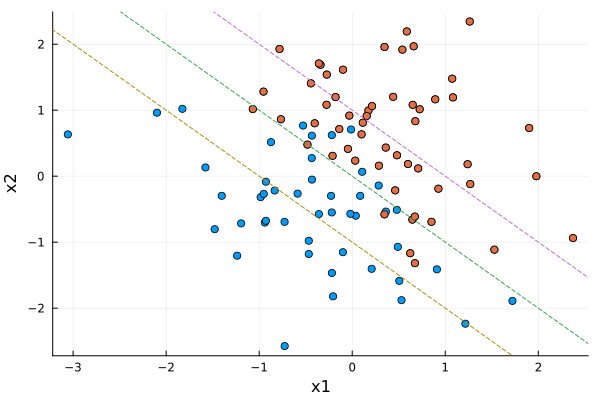

In [15]:
#예시 데이터 생성. 여기는 할게 없어요
using Random
Random.seed!(2023)
n = 100 # sample size
p = 2   # predictor dimension
C = 1   # cost for relaxation. 임의로 설정한 것이므로 최적의 값은 약간 다를 수 있습니다.
true_b = 0
true_w = [2, 2]
x = randn(n, p)
f(x) = x * true_w .- true_b
y = sign.(f(x) + randn(n)) # noise가 포함되어 있으므로 not linearly seperable하다. 
scatter(x[:,1], x[:,2], xlab = "x1", ylab = "x2", legend=false)
scatter!(x[y .== 1, 1], x[y .== 1, 2])
Plots.abline!(-1, 0, line=:dash) # 2 * x1 + 2 * x2 - 0 = 0 -> x2 = -x1 + 0
Plots.abline!(-1, 1, line=:dash)
Plots.abline!(-1, -1, line=:dash)

In [16]:
#문제 해결 코드를 완성하세요. 단, 위의 식을 바로 쓰기보다는 quadratic programming 형태로 바꿔 보세요! 3번 문제와 거의 유사한 형태가 됩니다.
c = Variable(n)
K = (x * x') .* (y * y') # x, y를 축약해서 n x n matrix로 나타낸 형태
objective = sum(c) -0.5 * quadform(c, K)
problem = maximize(objective, sum(c .* y) == 0, 0 <= c,C >= c)
solve!(problem, SCS.Optimizer)

------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 103, constraints m: 307
cones: 	  z: primal zero / dual free vars: 2
	  l: linear vars: 201
	  q: soc vars: 104, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 10406, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.43e+01  1.11e+00  4.51e+02 -2.64e+02  1.00e-01  4.85e-03 
   250| 1.54e-04  2.19e-06  1.27e-05 -3.12e+01  1.00e-01  2.80e-02 
--

In [17]:
#primal optimum 찾기
csol = evaluate(c) # support vector를 제외하고 0과 C=1에 매우 가까운 값들

100-element Vector{Float64}:
 -9.803010142655493e-7
 -2.1335321093928614e-6
  0.9999992542602927
  0.06954146127807162
  5.389970983821572e-6
  4.870473114868393e-7
  0.9302919475246925
  4.096984813070644e-6
  0.9999984184967693
 -1.8900522426142743e-6
 -1.446414242083881e-6
  1.291452363487757e-6
  1.0000047919079724
  ⋮
  1.730853740742217e-6
  1.188135712601835e-6
  1.2220110132925168e-5
  1.0000053908607005
  0.9999957890464422
  1.000002191949269
  5.618418276150244e-7
  5.53356565820895e-6
  1.4039739884057225e-7
  4.702225387880203e-6
  1.0000001257029123
  1.0000009538205679

In [18]:
sv_id = findall(x -> 1e-3 < x && C - 1e-3 > x, csol) #1e-3의 여유를 넣는 이유는 solver의 오차를 감안한 것입니다.

2-element Vector{Int64}:
 4
 7

In [19]:
w_hat = [sum(csol .* y .* x[:,1]), sum(csol .* y .* x[:,2])] #w의 추정값을 위에서 본 관계식을 이용해 계산

2-element Vector{Float64}:
 1.5760660552300334
 1.7721109617709656

In [20]:
b1 = w_hat' * x[4,:] - y[4]

-0.06768398171362744

In [21]:
b2 = w_hat' * x[7,:] - y[7]

-0.06771219491837854

In [22]:
b = (b1 + b2)/2 #똑같이 나왔으니 정상. solver의 오차 감안해 평균해서 사용

-0.06769808831600299

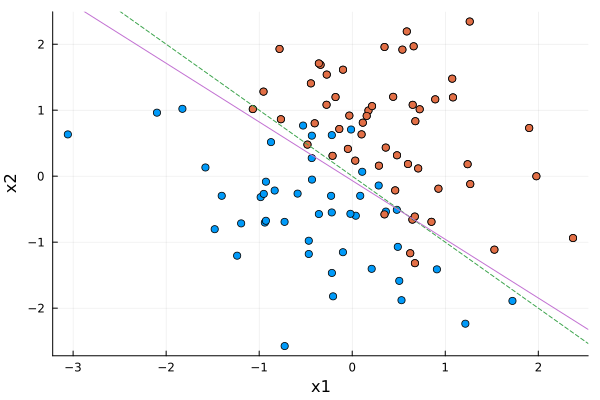

In [23]:
#결과 확인. Optimization 결과로 추정된 hyperplane과 실제 hyperplane이 유사함을 확인할 수 있을 것입니다.
scatter(x[:,1], x[:,2], xlab = "x1", ylab = "x2", legend=false)
scatter!(x[y .== 1, 1], x[y .== 1, 2])
Plots.abline!(-1, 0, line=:dash)
Plots.abline!(-w_hat[1]/w_hat[2], b, line=:solid)